In [1]:
import tensorflow as tf
!pip install git+https://github.com/d2l-ai/d2l-en
!pip install scipy==1.7.3
from d2l import tensorflow as d2l
import numpy as np
import time
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt


  Cloning https://github.com/d2l-ai/d2l-en to /tmp/pip-req-build-yatza5nr
  Running command git clone --filter=blob:none --quiet https://github.com/d2l-ai/d2l-en /tmp/pip-req-build-yatza5nr
  Resolved https://github.com/d2l-ai/d2l-en to commit 1ca368db8523672f52c4e997b1e330aee013f1ce
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 41.1 MB/s eta 0:00:00
  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires f

  Using cached scipy-1.7.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (39.9 MB)
  Using cached numpy-1.22.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
arviz 0.15.1 requires scipy>=1.8.0, but you have scipy 1.7.3 which is incompatible.
d2l 1.0.3 requires nu

# Setting up

In [2]:
# Setting up

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train

x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 1234)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# Normalizing the data
def normalize(x_train, y_train, x_test, y_test):
    # normalizing the pixel data
    x_train = x_train/255
    x_test = x_test/255
    # one hot encoding the labels
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    # flatting the data to one vector
    x_train = x_train.reshape(-1, 28*28)
    x_test = x_test.reshape(-1, 28*28)


    return x_train, y_train, x_test, y_test


x_train, y_train, x_test, y_test = normalize(x_train, y_train, x_test, y_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


11490434/11490434 [==============================] - 0s 0us/step


((49000, 784), (49000, 10), (21000, 784), (21000, 10))

## Task 1

In [4]:

# Stochastic gradient descent (SGD) optimizer with 0.0001 learning rate (nu)

sgd_opt = tf.keras.optimizers.SGD(learning_rate = 0.0001)

# Category cross-entropy loss

loss = tf.keras.losses.CategoricalCrossentropy()

# Define number of units per layer
n_hidden = 1
feature_size = 784
unit_size = 100


## Task 1:

# Building the model

# Using ReLu as an activation function in the model
act_ = tf.nn.relu

def build_mlp_model(feature_size, unit_size, n_hidden_layers, opt_, loss_, activ):
    model = tf.keras.Sequential([tf.keras.layers.Dense(unit_size, activation = activ, input_shape = [feature_size])])
    for i in range(n_hidden_layers):
        model.add(tf.keras.layers.Dense(unit_size, activation = activ,
                                        kernel_initializer = tf.keras.initializers.HeUniform(),
                                        bias_initializer = tf.keras.initializers.Zeros(),
                                        kernel_regularizer = tf.keras.regularizers.L1L2(l1 = 1e-5, l2 = 1e-4),
                                        bias_regularizer = tf.keras.regularizers.L2(1e-4)))
    model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))
    model.compile(optimizer = opt_, loss = loss_, metrics = ['accuracy'])
    return model

mlp = build_mlp_model(feature_size, unit_size, n_hidden, sgd_opt, loss, act_)
mlp.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
1532/1532 [==============================] - 9s 5ms/step - loss: 2.2862 - accuracy: 0.1837 - val_loss: 2.2276 - val_accuracy: 0.2336
Epoch 2/50
1532/1532 [==============================] - 9s 6ms/step - loss: 2.1646 - accuracy: 0.3010 - val_loss: 2.1162 - val_accuracy: 0.3466
Epoch 3/50
1532/1532 [==============================] - 7s 4ms/step - loss: 2.0555 - accuracy: 0.4090 - val_loss: 2.0092 - val_accuracy: 0.4419
Epoch 4/50
1532/1532 [==============================] - 8s 5ms/step - loss: 1.9470 - accuracy: 0.4903 - val_loss: 1.9004 - val_accuracy: 0.5161
Epoch 5/50
1532/1532 [==============================] - 7s 4ms/step - loss: 1.8360 - accuracy: 0.5559 - val_loss: 1.7886 - val_accuracy: 0.5768
Epoch 6/50
1532/1532 [==============================] - 9s 6ms/step - loss: 1.7229 - accuracy: 0.6118 - val_loss: 1.6756 - val_accuracy: 0.6248
Epoch 7/50
1532/1532 [==============================] - 8s 5ms/step - loss: 1.6101 - accuracy: 0.6560 - val_loss: 1.5642 - val_accuracy:

,accuracy,val_accuracy
49,0.887775,0.881476


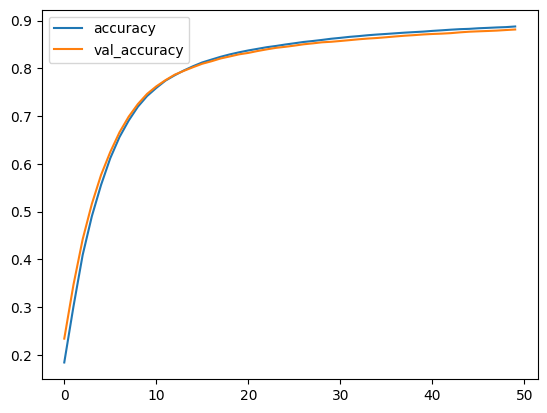

In [5]:

batch_size = 32
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 50)
history =mlp.fit(x_train, y_train, batch_size = batch_size, epochs = 50, verbose = 1, callbacks = [early_stop], validation_data = (x_test, y_test))

# Plots the accuracy
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

hist[['accuracy', 'val_accuracy']].plot()
hist[['accuracy', 'val_accuracy']].tail(1)


## Task 2

In [6]:

#Task 2:

# Using ReLu as an activation function in the model

batch_size = 32
sgd_opt = tf.keras.optimizers.SGD(learning_rate = 0.0001)
loss = tf.keras.losses.CategoricalCrossentropy()
act_ = tf.nn.relu

mlp_relu = build_mlp_model(feature_size, unit_size, n_hidden, sgd_opt, loss, act_)

# Initializing the timer
start_relu = time.perf_counter()
history_relu=mlp_relu.fit(x_train, y_train, batch_size = batch_size, epochs = 50, verbose = 1, callbacks = [early_stop], validation_data = (x_test, y_test))

# Stopping the timer
stop_relu= time.perf_counter()
print("ReLU took " + str(round(stop_relu-start_relu,2)) + " seconds to compile")


Epoch 1/50
1532/1532 [==============================] - 8s 5ms/step - loss: 2.3646 - accuracy: 0.1424 - val_loss: 2.2960 - val_accuracy: 0.1780
Epoch 2/50
1532/1532 [==============================] - 6s 4ms/step - loss: 2.2411 - accuracy: 0.2273 - val_loss: 2.1866 - val_accuracy: 0.2793
Epoch 3/50
1532/1532 [==============================] - 8s 5ms/step - loss: 2.1353 - accuracy: 0.3419 - val_loss: 2.0837 - val_accuracy: 0.3952
Epoch 4/50
1532/1532 [==============================] - 6s 4ms/step - loss: 2.0307 - accuracy: 0.4478 - val_loss: 1.9773 - val_accuracy: 0.4890
Epoch 5/50
1532/1532 [==============================] - 7s 5ms/step - loss: 1.9202 - accuracy: 0.5260 - val_loss: 1.8634 - val_accuracy: 0.5586
Epoch 6/50
1532/1532 [==============================] - 6s 4ms/step - loss: 1.8024 - accuracy: 0.5831 - val_loss: 1.7437 - val_accuracy: 0.6070
Epoch 7/50
1532/1532 [==============================] - 10s 6ms/step - loss: 1.6811 - accuracy: 0.6267 - val_loss: 1.6233 - val_accuracy

,accuracy,val_accuracy
49,0.885367,0.880619


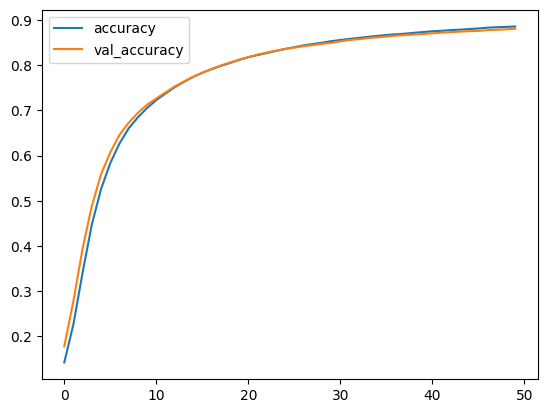

In [8]:
# Plots the accuracy
hist_relu = pd.DataFrame(history_relu.history)
hist_relu['epoch'] = history_relu.epoch

hist_relu[['accuracy', 'val_accuracy']].plot()
hist_relu[['accuracy', 'val_accuracy']].tail(1)


In [9]:

# Using Sigmoid as an activation function in the model
sgd_opt = tf.keras.optimizers.SGD(learning_rate = 0.0001)
loss = tf.keras.losses.CategoricalCrossentropy()
act_ = tf.nn.sigmoid
mlp2 = build_mlp_model(feature_size, unit_size, n_hidden, sgd_opt, loss, act_)
mlp2.summary()

# Initializing the timer
start_sig = time.perf_counter()
historysig=mlp2.fit(x_train, y_train, batch_size = batch_size, epochs = 50, verbose = 1, callbacks = [early_stop], validation_data = (x_test, y_test))

# Stopping the timer
stop_sig = time.perf_counter()
print("Sigmoid took " + str(round(stop_sig-start_sig,2)) + " seconds to compile")


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1532/1532 [==============================] - 8s 5ms/step - loss: 2.4767 - accuracy: 0.0992 - val_loss: 2.4174 - val_accuracy: 0.1013
Epoch 2/50
1532/1532 [==============================] - 6s 4ms/step - loss: 2.3912 - accuracy: 0.1089 - val_loss: 2.3651 - val_accuracy: 0.1374
Epoch 3/50
1532/1532 [====

Sigmoid has notably lower accuracy than ReLu for the same number of epochs. Therefore, Sigmoid has poorer performance than ReLu.


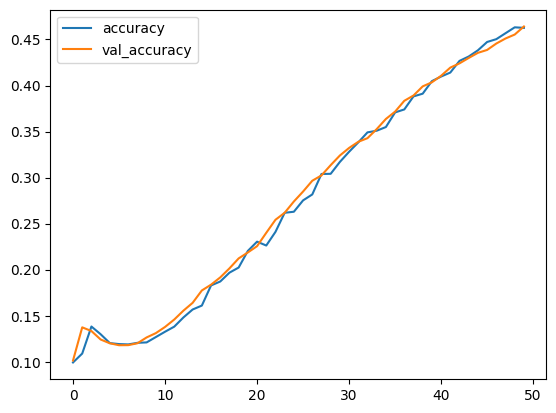

In [12]:
# Plots the accuracy for Sigmoid

hist_sig = pd.DataFrame(historysig.history)
hist_sig['epoch'] = historysig.epoch

hist_sig[['accuracy', 'val_accuracy']].plot()
hist_sig[['accuracy', 'val_accuracy']].tail(1)
print("Sigmoid has notably lower accuracy than ReLu for the same number of epochs. Therefore, Sigmoid has poorer performance than ReLu.")


In [11]:

# Using tanh as an activation function in the model

sgd_opt = tf.keras.optimizers.SGD(learning_rate = 0.0001)
loss = tf.keras.losses.CategoricalCrossentropy()
act_ = tf.nn.tanh
mlp3 = build_mlp_model(feature_size, unit_size, n_hidden, sgd_opt, loss, act_)
mlp3.summary()

# Initializing the timer
start_tanh = time.perf_counter()
history_tanh=mlp3.fit(x_train, y_train, batch_size = batch_size, epochs = 50, verbose = 1, callbacks = [early_stop], validation_data = (x_test, y_test))

# Stopping the timer
stop_tanh = time.perf_counter()
print("Tanh took " + str(round(stop_tanh-start_tanh,2)) + " seconds to compile")

print("Tahn's accuracy is in line with ReLU's accuracy for the same number of epochs")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1532/1532 [==============================] - 9s 5ms/step - loss: 2.2497 - accuracy: 0.2080 - val_loss: 2.0649 - val_accuracy: 0.3083
Epoch 2/50
1532/1532 [==============================] - 6s 4ms/step - loss: 1.9329 - accuracy: 0.3998 - val_loss: 1.8111 - val_accuracy: 0.4816
Epoch 3/50
1532/1532 [====

,accuracy,val_accuracy
49,0.88402,0.88081


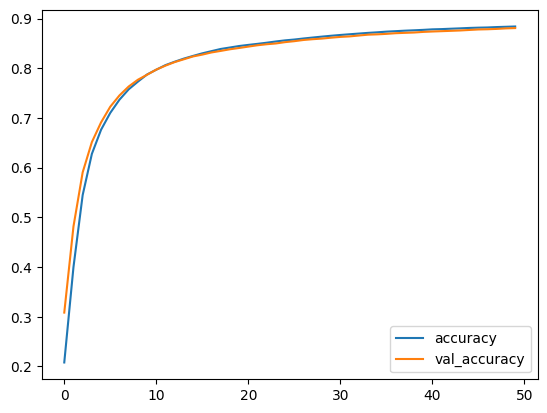

In [15]:
# Plots the accuracy for tanh
hist_tanh = pd.DataFrame(history_tanh.history)
hist_tanh['epoch'] = history_tanh.epoch

hist_tanh[['accuracy', 'val_accuracy']].plot()
hist_tanh[['accuracy', 'val_accuracy']].tail(1)


# Conclusion:

In [14]:
print("All three activation functions took similar amount of time to compile, around a six minutes.")

All three activation functions took similar amount of time to compile, around a six minutes.
